<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/ADMI_scoring/GSE65146_CIP_Bulk_ADMI_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADM index scoring using scanpy's "score genes" code modified for bulk
# GSE65146

## link Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Installing pakages on Colab

In [2]:
!pip install numpy==1.22.4 pandas==1.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libblkid1 libcairo-script-interpreter2
  libffi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev libmount1
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
The following packages will be upgr

In [4]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,012 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,060 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/uni

In [5]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [6]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 56 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 2s (779 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

In [7]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


#Load font

In [8]:
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.font_manager as fm

In [2]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Bulk score ADM

In [ ]:
raw_counts = pd.read_table('/content/drive/MyDrive/OtherPublishedCIP/Kong_2016_bulk/Kong2020_Microarray_GSE65146_MGI_symbols.txt', index_col=0, usecols=range(1,75))
raw_counts.head()

,P48Kras_00h1-01S.CEL,P48Kras_00h2-02S.CEL,P48Kras_00h3-03S.CEL,P48Kras_00h4-04S.CEL,P48Kras_03h1-02D.CEL,P48Kras_03h1-145-05E.CEL,P48Kras_03h2-145-06E.CEL,P48Kras_03h2-35-04E.CEL,P48Kras_12h1-138-11G.CEL,P48Kras_12h1-39-01J.CEL,...,WT_d52-07O.CEL,WT_d53-40C.CEL,WT_d54-41C.CEL,WT_d71-307-07F.CEL,WT_d73-307-05F.CEL,WT_d74-307-04F.CEL,WT_d141-01P.CEL,WT_d142-01O.CEL,WT_d142-02P.CEL,WT_d144-02O.CEL
MGI Symbol,,,,,,,,,,,,,,,,,,,,,
Zglp1,7.097500,6.229718,6.507104,6.898589,5.677102,5.880516,5.718827,5.774684,5.882622,5.616623,...,5.991321,5.956931,5.908533,6.401206,6.290138,6.359383,5.772477,6.421955,6.233654,6.151688
Vmn2r65,4.748291,4.339501,4.539871,4.544178,4.170694,4.276944,4.270222,4.269739,4.337352,4.200432,...,4.341034,4.329512,4.300954,4.304117,4.608434,4.770379,4.239349,4.329829,4.417959,4.526126
Gm10024,7.682676,7.483389,7.046413,7.430590,6.425680,6.666933,6.899584,6.696582,6.816502,6.623512,...,7.274925,7.087461,7.050570,7.555634,7.071240,7.555266,7.520472,7.928065,7.647370,7.461072
Oog3,6.103423,5.585073,5.960806,5.951109,4.817138,4.823659,5.153315,4.820156,4.723288,4.934739,...,4.906391,5.027693,4.903726,5.114322,4.971370,5.483770,4.995861,5.325224,4.795394,5.232450
Ldlrap1,8.510758,8.197497,8.667529,8.811810,9.531134,9.331532,9.856383,9.786410,8.367012,8.814864,...,8.311769,8.443377,8.625619,8.586370,8.435136,8.422118,8.693289,8.339553,8.530436,7.955813


In [ ]:
def bulk_score_ADM(
    bulk_data):

    # Normalize data: cpm --> log (base 2)+1 normalization
    bulk_data=bulk_data.applymap(pd.to_numeric)
    cpm_data = (+bulk_data/ np.sum(+bulk_data, axis=0)) * 1e6
    log_data = np.log2(cpm_data + 1)

    # Define ADMI gene list
    gene_list={
    'Prss3','Gm2663', '1810009J06Rik', 'Gm5771', 'Prss1','Gm4744','Gm10334',
    'Reg2', 'Reg3b', 'Reg3g','Reg3a',
    'Krt18','Krt8', 'Krt19', 'Clu',
    'Tspan1','Cldn4'}

    np.random.seed(0)

    # Determine which gene_list variables are present in input data
    gene_list_in_data = []
    genes_to_ignore = []
    for gene in gene_list:
        if gene in log_data.index:
            gene_list_in_data.append(gene)
        else:
            genes_to_ignore.append(gene)
    if len(genes_to_ignore) > 0:
        print(f'Warning: genes are not in data and ignored: {genes_to_ignore}')
    gene_list = set(gene_list_in_data[:])

    if len(gene_list) == 0:
        raise ValueError("No valid genes were passed for scoring.")

    # # Extract geen names
    # gene_pool = log_data.index.tolist()

    n_bins = 25

    # Seurat approach in scoring cells -- compare genes against random genes in a matched interval of expression.
    obs_avg = pd.Series(np.nanmean(log_data, axis=1), index=log_data.index) # matrix with average expression of genes across all samples
    n_items = int(np.round(len(obs_avg) / (n_bins - 1))) # number of items in each bin
    obs_cut = obs_avg.rank(method='min') // n_items # makes a pandas series denoting which bin each gene belongs to
    control_genes = set()

    # takes control_genes from each unique expression interval
    for cut in np.unique(obs_cut.loc[list(gene_list)]):
        r_genes = np.array(obs_cut[obs_cut == cut].index)
        np.random.shuffle(r_genes)
        ctrl_size = len(r_genes)
        control_genes.update(set(r_genes[:ctrl_size]))

    # Final gene lists
    control_genes = list(control_genes - gene_list)
    gene_list = list(gene_list)

    # Extract the expression values for the genes of interest
    X_list = log_data.loc[gene_list].values
    X_list = np.nanmean(X_list, axis=0, dtype='float64')

    # Extract the expression values for the control genes
    X_control = log_data.loc[control_genes].values
    X_control = np.nanmean(X_control, axis=0, dtype='float64')

    score = X_list - X_control

    # Create a new DataFrame with the column names of bulk_data as row names and the corresponding values from score as the only column
    score_df = pd.DataFrame(data=score, index=log_data.columns, columns=["scores"])
    return(score_df)

In [ ]:
df=bulk_score_ADM(raw_counts)

## plot

In [ ]:
df = df.reset_index(drop=False)

In [ ]:
# Reset the index and set the original index as a new column
df = df.reset_index(drop=False)
df = df.rename(columns={'index': 'Donor'})


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/OtherPublishedCIP/Kong_2016_bulk/Kong_bulk_metadata.csv', index_col=0)

In [ ]:
metadata

,Condition,Donor,Timepoint
Sample,,,
Kong,Kras,P48Kras_00h1-01S.CEL,control
Kong,Kras,P48Kras_00h2-02S.CEL,control
Kong,Kras,P48Kras_00h3-03S.CEL,control
Kong,Kras,P48Kras_00h4-04S.CEL,control
Kong,Kras,P48Kras_03h1-02D.CEL,3h
...,...,...,...
Kong,WT,WT_d74-307-04F.CEL,d7
Kong,WT,WT_d141-01P.CEL,d14
Kong,WT,WT_d142-01O.CEL,d14


In [ ]:
#Merge data on "sample names"
metadata = pd.DataFrame(metadata)

# merge dataframes on "donor" column
merged_df = pd.merge(metadata, df, on='Donor', how='outer')

In [ ]:
merged_df

,Condition,Donor,Timepoint,level_0,scores
0,Kras,P48Kras_00h1-01S.CEL,control,0,0.229833
1,Kras,P48Kras_00h2-02S.CEL,control,1,0.201114
2,Kras,P48Kras_00h3-03S.CEL,control,2,0.228865
3,Kras,P48Kras_00h4-04S.CEL,control,3,0.233495
4,Kras,P48Kras_03h1-02D.CEL,3h,4,0.317326
...,...,...,...,...,...
68,WT,WT_d74-307-04F.CEL,d7,68,0.187759
69,WT,WT_d141-01P.CEL,d14,69,0.105738
70,WT,WT_d142-01O.CEL,d14,70,0.133928
71,WT,WT_d142-02P.CEL,d14,71,0.089343


In [ ]:
kras=merged_df[merged_df['Condition']=='Kras']
kras

,Condition,Donor,Timepoint,level_0,scores
0,Kras,P48Kras_00h1-01S.CEL,control,0,0.229833
1,Kras,P48Kras_00h2-02S.CEL,control,1,0.201114
2,Kras,P48Kras_00h3-03S.CEL,control,2,0.228865
3,Kras,P48Kras_00h4-04S.CEL,control,3,0.233495
4,Kras,P48Kras_03h1-02D.CEL,3h,4,0.317326
5,Kras,P48Kras_03h1-145-05E.CEL,3h,5,0.296981
6,Kras,P48Kras_03h2-145-06E.CEL,3h,6,0.359786
7,Kras,P48Kras_03h2-35-04E.CEL,12h,7,0.302616
8,Kras,P48Kras_12h1-138-11G.CEL,12h,8,0.311091
9,Kras,P48Kras_12h1-39-01J.CEL,12h,9,0.323307


In [ ]:
wt=merged_df[merged_df['Condition']=='WT']
wt

,Condition,Donor,Timepoint,level_0,scores
29,WT,WT_00h1-04R.CEL,control,29,0.221621
30,WT,WT_00h2-05R.CEL,control,30,0.204892
31,WT,WT_00h3-06R.CEL,control,31,0.194083
32,WT,WT_00h2-01A.CEL,control,32,0.212533
33,WT,WT_00h3-02A.CEL,control,33,0.193488
34,WT,WT_03h1-04A.CEL,3h,34,0.329105
35,WT,WT_03h2-23C.CEL,3h,35,0.328396
36,WT,WT_03h3-05A.CEL,3h,36,0.346332
37,WT,WT_12h1-07A.CEL,12h,37,0.297674
38,WT,WT_12h2-08A.CEL,12h,38,0.324154


#plotting

In [ ]:
plt.rcParams['figure.dpi']=200

In [ ]:
# define a dictionary to map old names to new names
mapping = {'control': 'Control', '3h': '3hr', '12h': '12hr',
           '24h': '24hr', '36h': '36hr', '48h': '48hr', '60h': '60hr',
           '72h': '72hr','84h': '84hr','96h': '96hr',
           'd5': '5day','d7': '7day','d14': '14day'}

# use the replace method to rename categories
wt['Timepoint'] = merged_df['Timepoint'].replace(mapping)


<ipython-input-64-953ebdd1fabe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wt['Timepoint'] = merged_df['Timepoint'].replace(mapping)


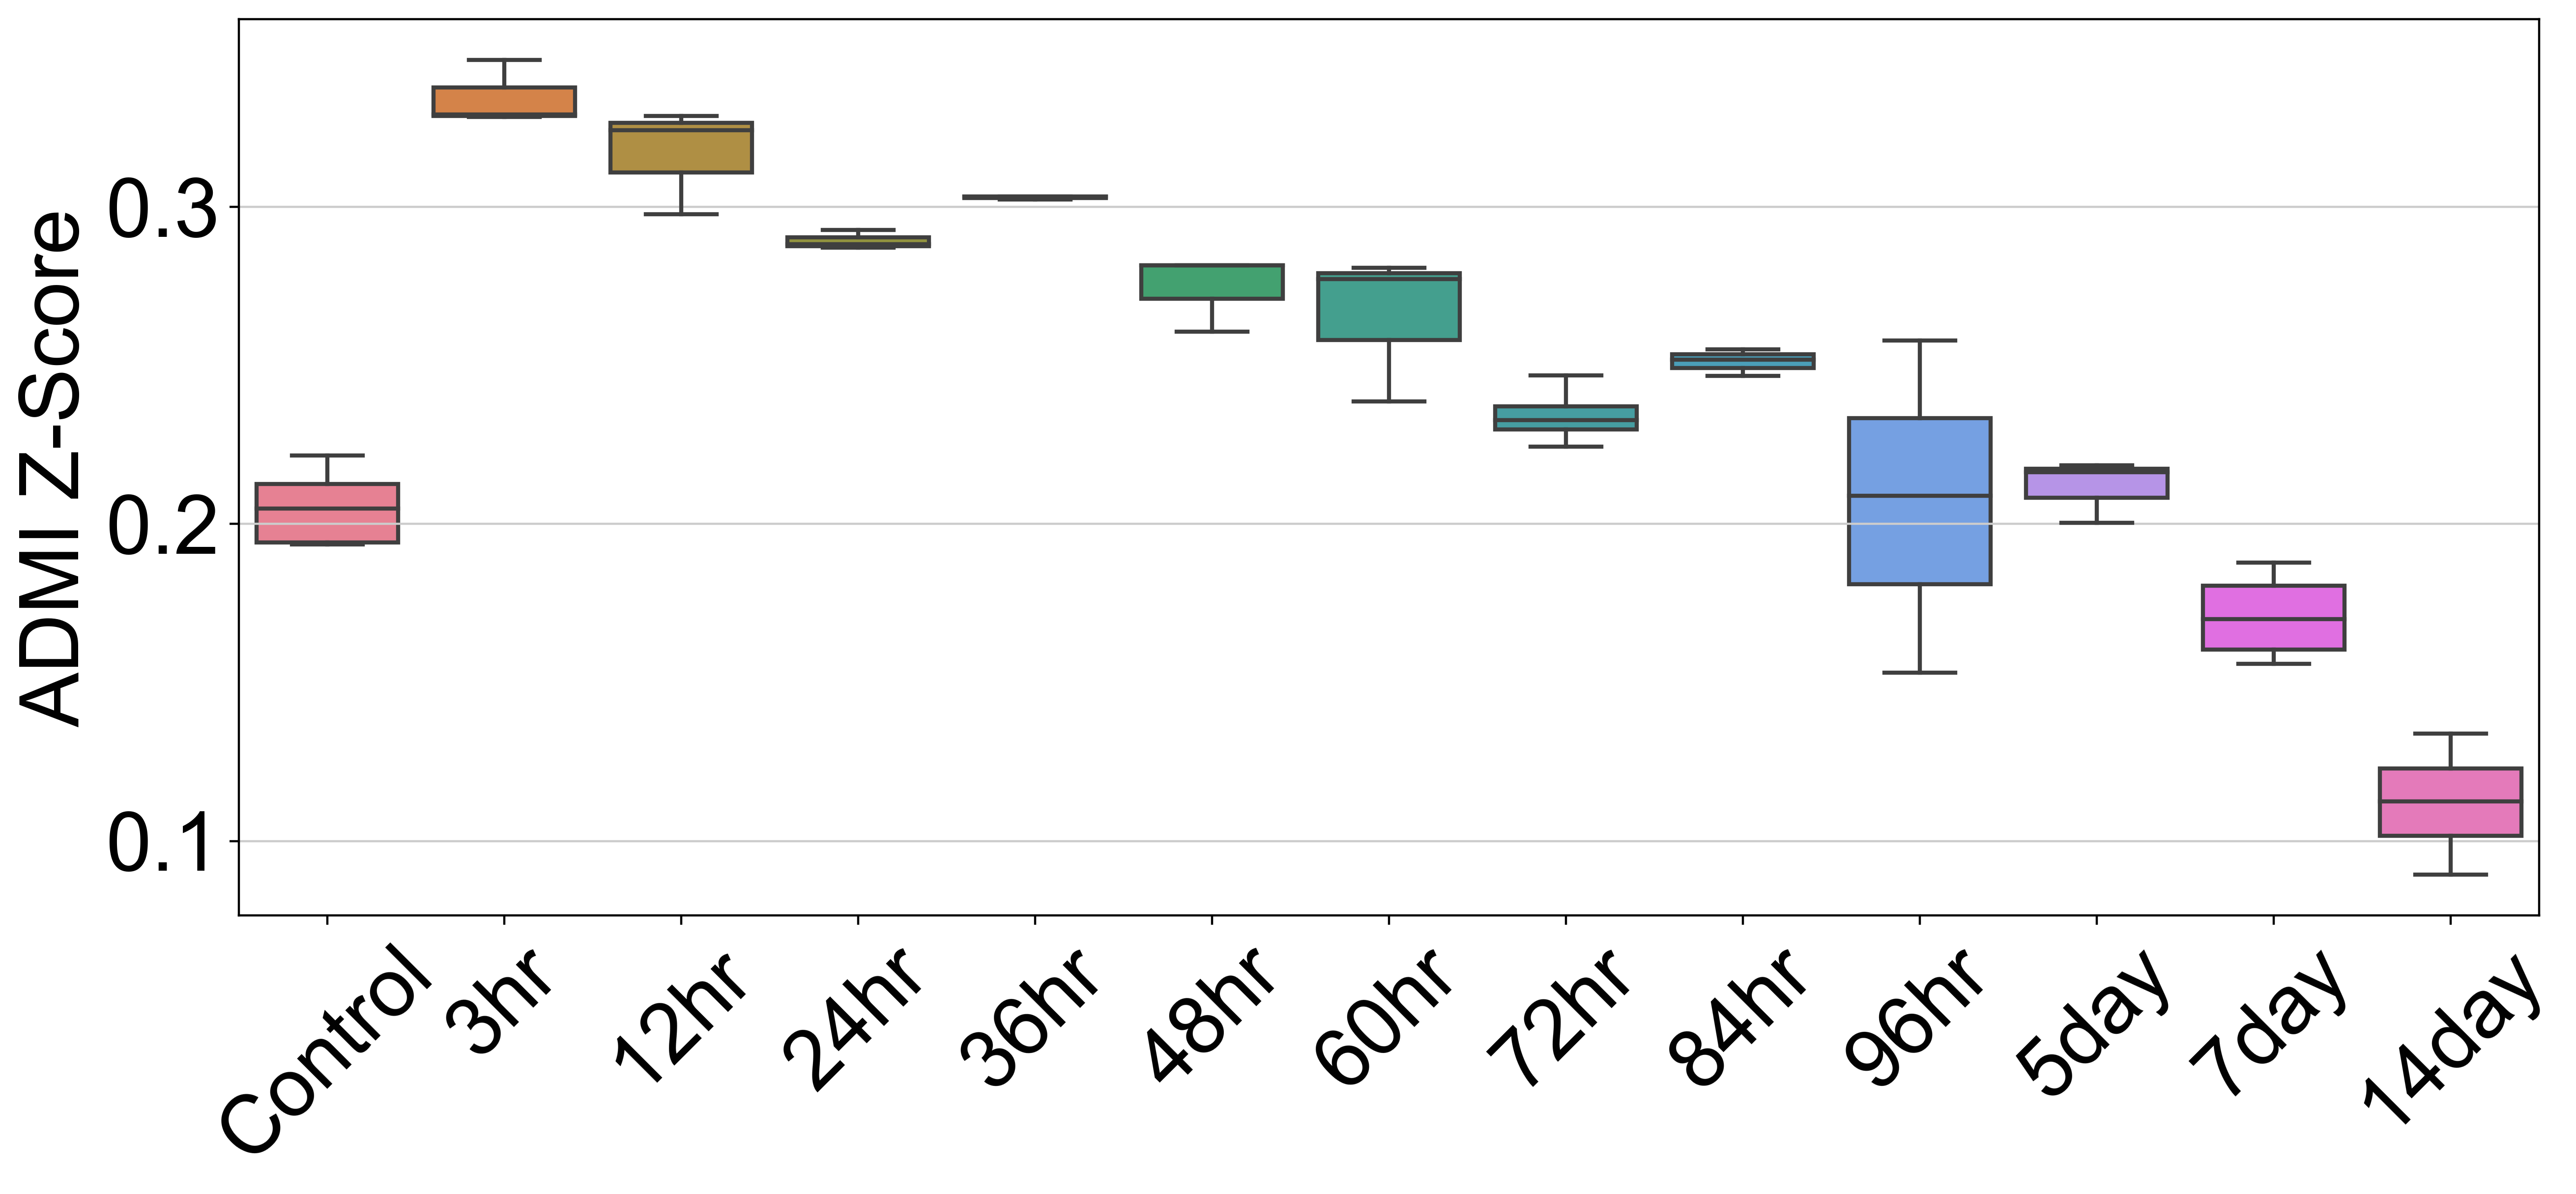

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

var = "Timepoint"

# set the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# get the number of unique treatment groups
num_treatment_groups = wt[var].nunique()

# create a custom color palette with enough colors for all treatment groups
custom_palette = sns.color_palette("husl", num_treatment_groups)

# create the boxplot using Seaborn with the custom color palette
sns.boxplot(x=var, y='scores', data=wt, showfliers=False, showmeans=False, ax=ax, palette=custom_palette)

# set the title and axis labels
#ax.set_xlabel(var, fontsize=30)
ax.set_ylabel('ADMI Z-Score', fontsize=30)

# increase the size of the x and y tick labels
ax.tick_params(axis='both', labelsize=30)
ax.set_xlabel('')
plt.xticks(rotation=45)

# remove the vertical grid lines
ax.grid(axis='x', linewidth=0)

# show the plot
plt.show()
